<a href="https://colab.research.google.com/github/GabeXxX/NAPDE-Coursework/blob/main/Vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

# TODO
- [x] preprocessing the data and shuffling it (How? search, not copy)
- [ ] Define the encoder network
- [ ] Define the decoder network  
- [ ] implement the reparameterization trick
- [ ] define the loss function and the optimizer (what is an optimzer in keras? search, not copy)
- [ ] train the network
- [ ] generate image
- [ ] finish and integrate blog post on theory    

# Load and pre-process data
Each MNIST image is originally a vector of 28x28 integers, each of which is between 0-255 and represents the intensity of a pixel. We Model each pixel with a Bernoulli distribution in our model, first normalizing(helping the gradient calculations to stay consistent, and not get so large so that they slow down or prevent a network to converge) and then binarizing each images.

Then we shuffle the data, ensuring that each batch contains a different mix of data, which helps the model to learn from different patterns in each epoch.

In [2]:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Discard label as we don't use it
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Normalize
x_train = x_train / 255
x_test = x_test / 255

In [6]:
# Binarize
def binarize_images(images):
  return np.where(images > 0.5, 1.0, 0.0)

In [7]:
x_train = binarize_images(x_train)
x_test = binarize_images(x_test)

In [8]:
# Visualizing
def visualize_binary_vectors(dataset, width, height, num_vectors=8):
    fig, axes = plt.subplots(2, 4, figsize=(10, 5))

    for i in range(num_vectors):
        binary_vector = dataset[i, :]
        binary_matrix = np.array(binary_vector).reshape((height, width))

        # Plot each binary image as a subplot
        n = np.ceil(num_vectors/2).astype(int)
        ax = axes[i // n, i % n]
        ax.imshow(binary_matrix)
        ax.set_title(f'Image {i + 1}')

    plt.tight_layout()
    plt.show()

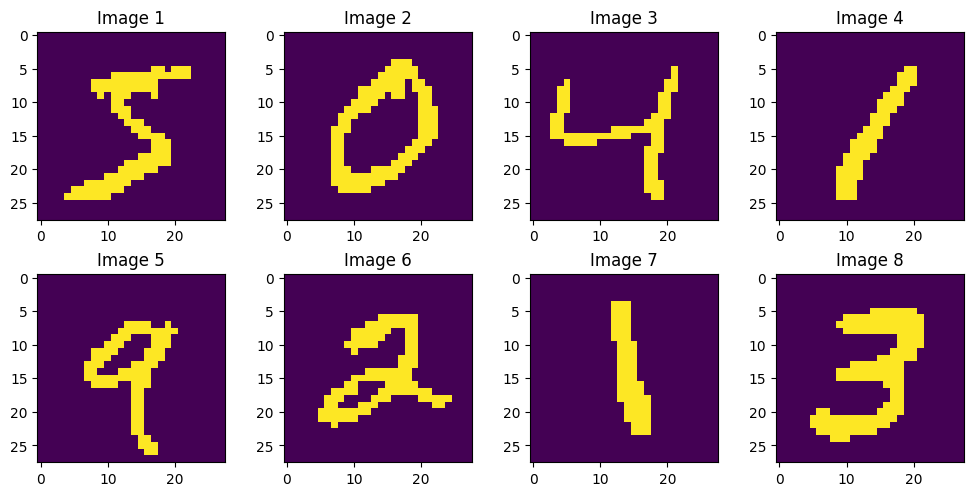

In [9]:
visualize_binary_vectors(x_train[:8, : ,:], 28, 28)

In [10]:
# define some useful variable
train_size = x_train.shape[0]
test_size = x_test.shape[0]
batch_size = 32

In [12]:
# Shuffle the data
train_data = tf.data.Dataset.from_tensor_slices(x_train).shuffle(train_size)
test_data = tf.data.Dataset.from_tensor_slices(x_test).shuffle(test_size)

# Batch the data
train_data = train_data.batch(batch_size)
test_data = test_data.batch(batch_size)

# Define the network
We need to define the encoder, the decoder, the reparametrization trick, the loss function and the optimizer.

Which input shape the network accept? We define as input shape the shape of a single image, i.e. a 28x28 image.

What's the rational behind the deep/filter return from a single Convolutional layer?
Convolutional layers with multiple filters allow the network to learn a diverse set of features from the input data. Each filter specializes in detecting different patterns or features within the input image. A deeper network with more filters can capture more complex and abstract features, enabling better representation learning.

In [ ]:
class ConvolutionalVAE(tf.keras.Model):
  def __init__(self, latent_dim):
    super().__init__();
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.Input(shape = (28,28,1)),
            tf.keras.layers.Conv2D(filters = 16, kernel_size=(3,3), strides = (1,1), padding = "valid", activation = "relu"),
            tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), strides = (1,1), padding = "valid", activation = "relu"),
            tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), strides = (1,1), padding = "valid", activation = "relu"),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units = latent_dim + latent_dim) # No activation function in this layer
        ]
    )




# Sources
1. https://www.tensorflow.org/tutorials/generative/cvae
2. https://keras.io/examples/generative/vae/